## 앙상블 모델과 단일 모델 성능 비교 <hr>
- 데이터 : sklearn.datasets 의 breast_cancer
- 유형 : 지도학습 + 분류
- 방법 : LogisticRegression, DecisionTree, RandomForest

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
X, y = load_breast_cancer(as_frame=True, return_X_y=True)

In [3]:
X.shape, y.shape

((569, 30), (569,))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=17, stratify=y)

[2] 학습 진행 <hr>

[2-1] 선형회귀 LogisticRegression

In [6]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

[2-2] DecisionTree 알고리즘 기반 분류 

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

[2-3] Ensembl 알고리즘 기반 분류

In [11]:
# 배깅방식(RandomForest)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=17)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=17)

In [12]:
## 3개 알고리즘 모델에 대한 성능 평가
print(f'[LogisticRegression] Train : {lr_model.score(X_train, y_train)}, Test : {lr_model.score(X_test, y_test)}')

[LogisticRegression] Train : 0.9516483516483516, Test : 0.9736842105263158


In [13]:
print(f'[Decision Tree] Train : {dt_model.score(X_train, y_train)}, Test : {dt_model.score(X_test, y_test)}')
print(f'[RandomForest] Train : {rf_model.score(X_train, y_train)}, Test : {rf_model.score(X_test, y_test)}')

[Decision Tree] Train : 1.0, Test : 0.9912280701754386
[RandomForest] Train : 1.0, Test : 0.9912280701754386


In [16]:
featuresDF = pd.DataFrame([rf_model.feature_names_in_,rf_model.feature_importances_])
featuresDF = featuresDF.T
featuresDF.set_index(0, inplace=True)

In [22]:
featuresDF.sort_values(1, ascending=False,inplace=True)

<Axes: ylabel='0'>

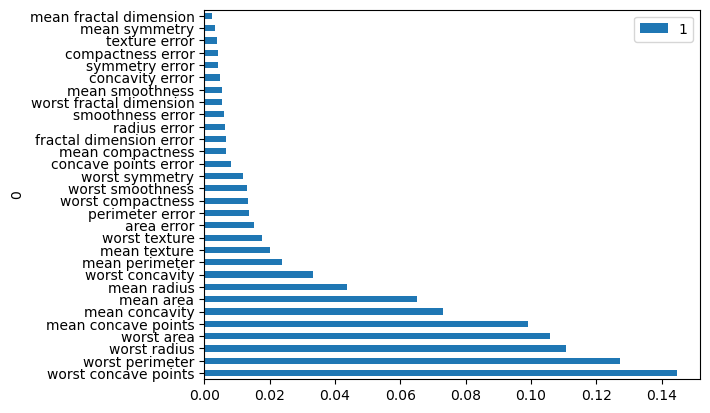

In [23]:
featuresDF.plot(kind='barh')

In [24]:
import lightgbm as lgb
import xgboost as xgb